In [5]:
import gudhi as gd
from gudhi.wasserstein.barycenter import lagrangian_barycenter as bary
from gudhi import plot_persistence_diagram

import numpy as np
import matplotlib.pyplot as plt

In [8]:
diag1 = np.array([[0., 1.], [0,2], [1,2], [1.23, 1.78], [0.7, 1.2]])
diag2 = np.array([[0, 1.5], [0.5, 2], [1.2, 2], [1.3, 1.8], [0.4, 0.8]])
diag3 = np.array([[0.2, 1.1], [0.1, 2.2], [1.3, 2.1], [0.5, 0.9], [0.6, 1.1]])

diags = [diag1, diag2, diag3]

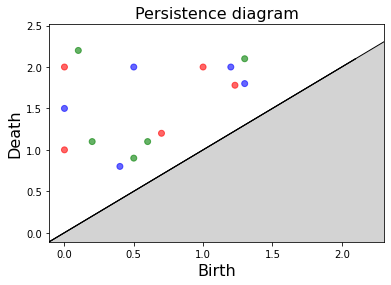

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['r', 'b', 'g']
for diag, color in zip(diags, colors):
    plot_persistence_diagram(diag, axes = ax, colormap = color)
plt.show()

In [12]:
b, log = bary(diags, init = 0, verbose = True)

In [15]:
G = log["groupings"]

def proj_on_diag(x):
    return ((x[1] + x[0]) /2, (x[1] + x[0])/2)

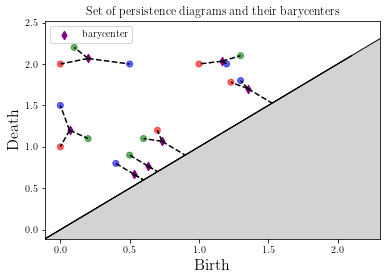

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['r', 'b', 'g']
for diag, color in zip(diags, colors):
    plot_persistence_diagram(diag, axes = ax, colormap = color)

def plot_bary(b, diags, groupings, axes):
    for i in range(len(diags)):
        idx = G[i]
        n_i = len(diags[i])
        
        for (y_j, x_ij) in idx:
            y = b[y_j]
            if y[0] != y[1]:
                # not on diag
                if x_ij >= 0:
                    # not mapped with the diag
                    x = diags[i][x_ij]
                else:
                    x = proj_on_diag(y)
                ax.plot([y[0], x[0]], [y[1], x[1]], c='black', linestyle='dashed')
    ax.scatter(b[:,0], b[:,1], color = "purple", marker="d", label="barycenter")
    ax.legend(loc=0)
    ax.set_title("Set of persistence diagrams and their barycenters")

plot_bary(b, diags, G, ax)

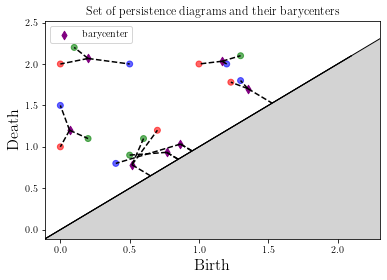

In [23]:
b, log = bary(diags, init = 1, verbose = True)

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['r', 'b', 'g']
for diag, color in zip(diags, colors):
    plot_persistence_diagram(diag, axes = ax, colormap = color)
plot_bary(b, diags, G, ax)